In [94]:
import numpy as np
import pandas as pd
import random as rn
import itertools
import time 
import matplotlib.pyplot as plt

    Objem 1-50 (náhodně) 
    Cena 1-50 (náhodně)
    Max objem = 300 (bereme v potaz 15 tříd)
    Max cena = x

# Random search

In [95]:
def gen_classes(n_class,n_item):
    classes = [ ]
    for cl in range(n_class):
        item_dic = { }
        for it in range(n_item):
            item_dic.update({it+1:[rn.randint(1,50),rn.randint(1,50)]})
        classes.append(item_dic)
    return classes

def init_choice(it_classes):
    init_comb, choi_ls = [ ], [ ]
    for item in it_classes:
        choice = rn.randint(1,len(item))
        init_comb.append(item[choice])
        choi_ls.append(choice)
    return init_comb, choi_ls

def new_comb(init_comb,n_item, it_classes):
    end = False
    classes, prob = [0]*len(init_comb), [(len(init_comb)//len(init_comb))/10]*len(init_comb)
    classes = [classes[i]+i for i in range(len(classes))]
    while end is False:
        choice_idx, choice = rn.choices(classes, prob), rn.randint(1,n_item)
        if init_comb[choice_idx[0]] != it_classes[choice_idx[0]][choice]:
            init_comb[choice_idx[0]] = it_classes[choice_idx[0]][choice]
            end = True
    return init_comb

def Random_search(n_class,n_item,max_c,n_it):
    max_price, n_nei = 50, 10
    it_classes = gen_classes(n_class,n_item)
    init_comb, choi_ls = init_choice(it_classes)
    B_sol, B_sol_ls = [0,300], [ ]
    for it in range(n_it//n_nei):
        for nei in range(n_nei):
            ev, c_lim = list(map(lambda ele: ele[0],init_comb)), list(map(lambda ele: ele[1],init_comb))
            ev, c_lim = sum(ev), sum(c_lim)
            if ev > B_sol[0] and c_lim < 300:
                B_sol = [ev,c_lim]
            init_comb = new_comb(init_comb,n_item,it_classes)
            B_sol_ls.append(B_sol[0])
    return B_sol, B_sol_ls

# Simulated Annealing

In [96]:
def gen_classes(n_class,n_item):
    classes = [ ]
    for cl in range(n_class):
        item_dic = { }
        for it in range(n_item):
            item_dic.update({it+1:[rn.randint(1,50),rn.randint(1,50)]})
        classes.append(item_dic)
    return classes

def init_choice(it_classes):
    init_comb, choi_ls = [ ], [ ]
    for item in it_classes:
        choice = rn.randint(1,len(item))
        init_comb.append(item[choice])
        choi_ls.append(choice)
    return init_comb, choi_ls

def new_comb(init_comb,n_item, it_classes):
    end = False
    classes, prob = [0]*len(init_comb), [(len(init_comb)//len(init_comb))/10]*len(init_comb)
    classes = [classes[i]+i for i in range(len(classes))]
    while end is False:
        choice_idx, choice = rn.choices(classes, prob), rn.randint(1,n_item)
        if init_comb[choice_idx[0]] != it_classes[choice_idx[0]][choice]:
            init_comb[choice_idx[0]] = it_classes[choice_idx[0]][choice]
            end = True
    return init_comb

def Sim_ann(n_class,n_item,max_c,n_it):
    max_price, n_nei = 50, 10
    t_0 = n_it//n_nei
    it_classes = gen_classes(n_class,n_item)
    init_comb, choi_ls = init_choice(it_classes)
    B_sol, B_sol_ls, step_sol = [0,300], [ ], [0,0]
    for it in range(n_it//n_nei):
        for nei in range(n_nei):
            ev, c_lim = list(map(lambda ele: ele[0],init_comb)), list(map(lambda ele: ele[1],init_comb))
            ev, c_lim = sum(ev), sum(c_lim)

            delta_fx = ev - step_sol[0]
            if delta_fx > 0 and c_lim < 300:
                step_sol = [ev,c_lim]
            if ev > B_sol[0] and c_lim < 300:
                B_sol = [ev,c_lim]
            else:
                r = rn.uniform(0,1)
                if r > np.power(np.e,-delta_fx/t_0):
                    step_sol = [ev,c_lim]
                    
            t_0 = t_0-0.7*it       
            init_comb = new_comb(init_comb,n_item,it_classes)
            B_sol_ls.append(B_sol[0])
    return B_sol, B_sol_ls

In [106]:
B_sol_SA, plot_y_SA = Sim_ann(15,3,300,50_000)
print(f'Celkova cena {B_sol_SA[0]}, Celkova kapacita {B_sol_SA[1]}')

Celkova cena 571, Celkova kapacita 281


In [107]:
B_sol, plot_y = Random_search(15,3,300,50_000)
print(f'Celkova cena {B_sol[0]}, Celkova kapacita {B_sol[1]}')

Celkova cena 544, Celkova kapacita 294


# 15 tříd  - 3 předměty

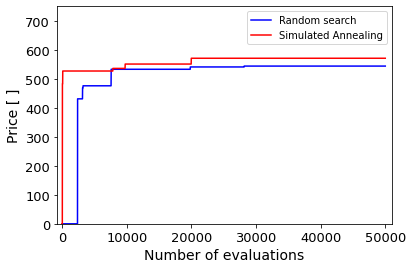

In [108]:
plot_x = [0]*50_000
plot_x = [plot_x[i]+i for i in range(len(plot_x))]
plt.plot(plot_x,plot_y, color = 'blue', label = 'Random search')
plt.plot(plot_x,plot_y_SA, color = 'red', label = 'Simulated Annealing')
plt.xlim(-800,51_000), plt.ylim(0,15*50)
plt.xticks(size = 13), plt.yticks(size = 13)
plt.xlabel('Number of evaluations', size = 14), plt.ylabel('Price [ ]', size = 14)
plt.legend()
plt.show()

In [127]:
B_sol_SA, plot_y_SA = Sim_ann(15,10,300,50_000)
print(f'Celkova cena {B_sol_SA[0]}, Celkova kapacita {B_sol_SA[1]}')

Celkova cena 581, Celkova kapacita 260


In [128]:
B_sol, plot_y = Random_search(15,10,300,50_000)
print(f'Celkova cena {B_sol[0]}, Celkova kapacita {B_sol[1]}')

Celkova cena 549, Celkova kapacita 293


# 15 tříd - 10 předmětů 

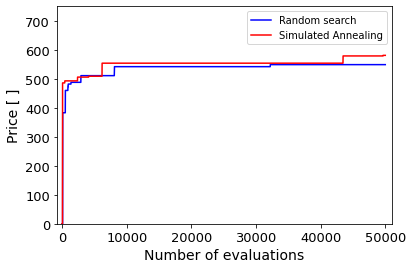

In [129]:
plot_x = [0]*50_000
plot_x = [plot_x[i]+i for i in range(len(plot_x))]
plt.plot(plot_x,plot_y, color = 'blue', label = 'Random search')
plt.plot(plot_x,plot_y_SA, color = 'red', label = 'Simulated Annealing')
plt.xlim(-800,51_000), plt.ylim(0,15*50)
plt.xticks(size = 13), plt.yticks(size = 13)
plt.xlabel('Number of evaluations', size = 14), plt.ylabel('Price [ ]', size = 14)
plt.legend()
plt.show()